## 📦 Import Required Libraries & Transformers


In [105]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

## 📥 Data Loading & Train–Test Split


In [106]:
df=pd.read_csv("/content/House_Rent_Dataset.csv",usecols=['BHK','Rent','Size'])

In [107]:
df.sample(10)

,BHK,Rent,Size
1504,1,7500,400
918,2,90000,994
4418,3,46000,2235
2024,2,14000,1300
4224,3,40000,1900
401,2,6000,600
1396,1,26000,649
2473,1,13000,400
4027,2,17000,875
3176,2,16000,870


In [108]:
x=df.drop(columns='Rent')
y=df['Rent']

## 📐 Log Transformation (FunctionTransformer) – Before vs After


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [110]:
trf=FunctionTransformer(func=np.log1p)

In [111]:
x_train_log=trf.fit_transform(x_train)
x_test_log=trf.transform(x_test)

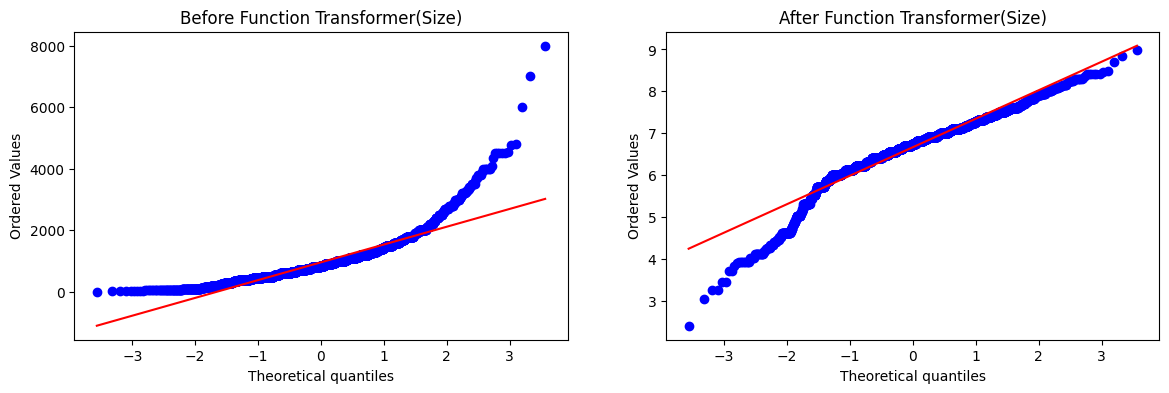

In [112]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Size'],dist='norm',plot=plt)
plt.title('Before Function Transformer(Size)')

plt.subplot(122)
stats.probplot(x_train_log['Size'],dist='norm',plot=plt)
plt.title("After Function Transformer(Size)")
plt.show()

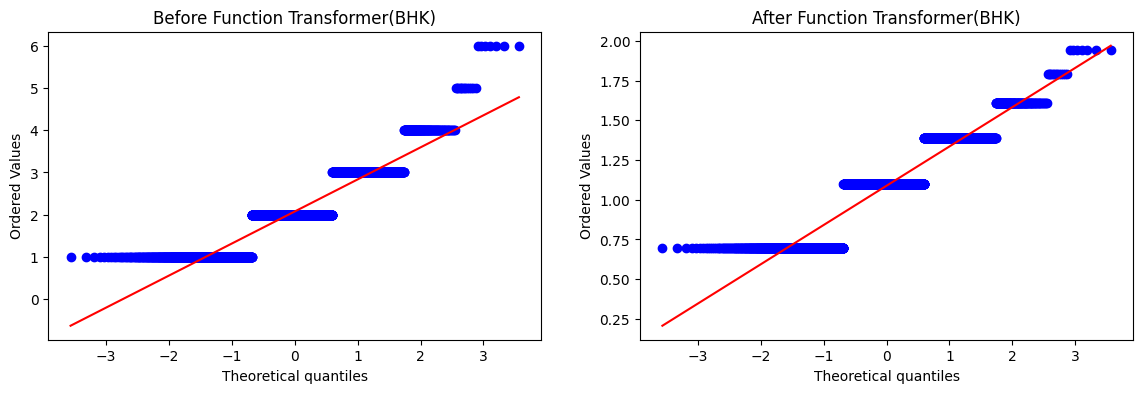

In [113]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['BHK'],dist='norm',plot=plt)
plt.title('Before Function Transformer(BHK)')

plt.subplot(122)
stats.probplot(x_train_log['BHK'],dist='norm',plot=plt)
plt.title("After Function Transformer(BHK)")
plt.show()


## 📐 Power Transformation (FunctionTransformer: x⁴) – Before vs After


In [114]:
trf2=FunctionTransformer(func=lambda x:x**4)

In [115]:
x_train_trf2=trf2.fit_transform(x_train)
x_test_trf2=trf2.transform(x_test)

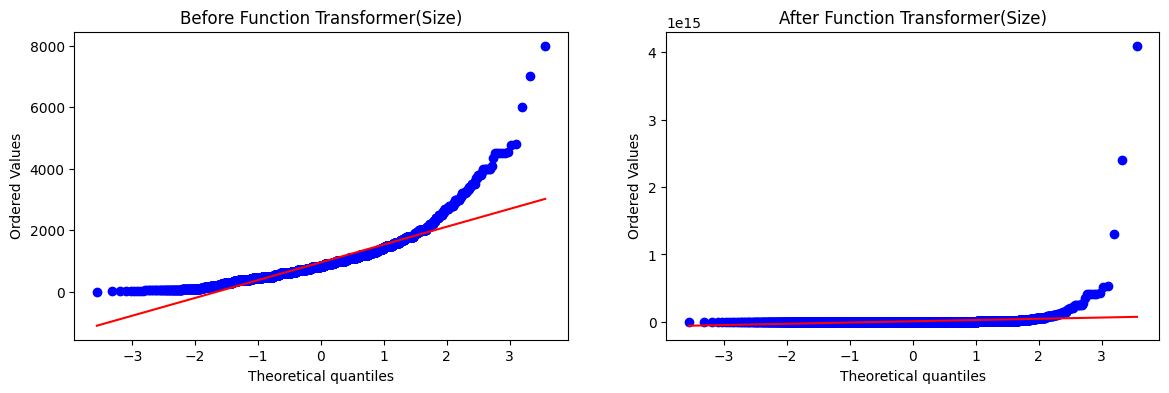

In [116]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Size'],dist='norm',plot=plt)
plt.title('Before Function Transformer(Size)')

plt.subplot(122)
stats.probplot(x_train_trf2['Size'],dist='norm',plot=plt)
plt.title("After Function Transformer(Size)")
plt.show()

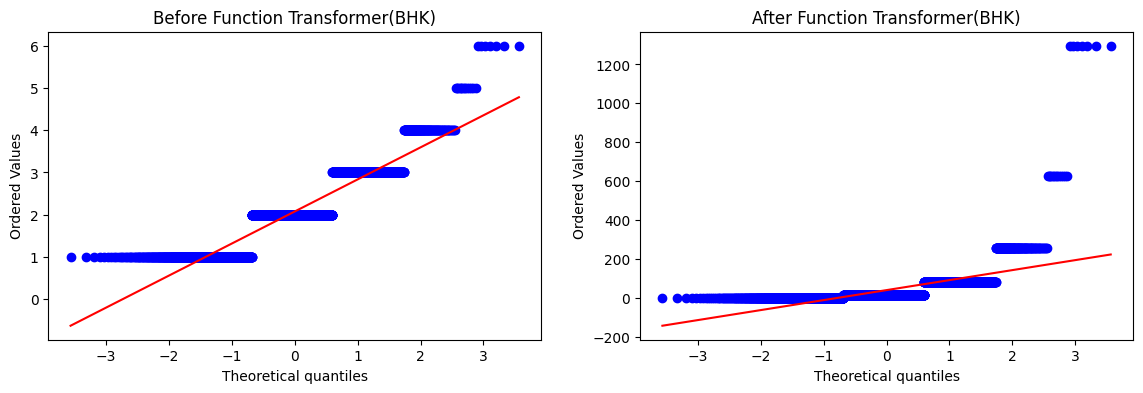

In [117]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['BHK'],dist='norm',plot=plt)
plt.title('Before Function Transformer(BHK)')

plt.subplot(122)
stats.probplot(x_train_trf2['BHK'],dist='norm',plot=plt)
plt.title("After Function Transformer(BHK)")
plt.show()

## 📐 Power Transformation (box-cox) – Before vs After


In [118]:
pt1=PowerTransformer(method='box-cox')

In [119]:
x_train_pt1=pt1.fit_transform(x_train)
x_test_pt1=pt1.fit_transform(x_test)

In [120]:
x_train_pt1=pd.DataFrame(x_train_pt1,columns=x_train.columns)
x_test_pt1=pd.DataFrame(x_test_pt1,columns=x_test.columns)

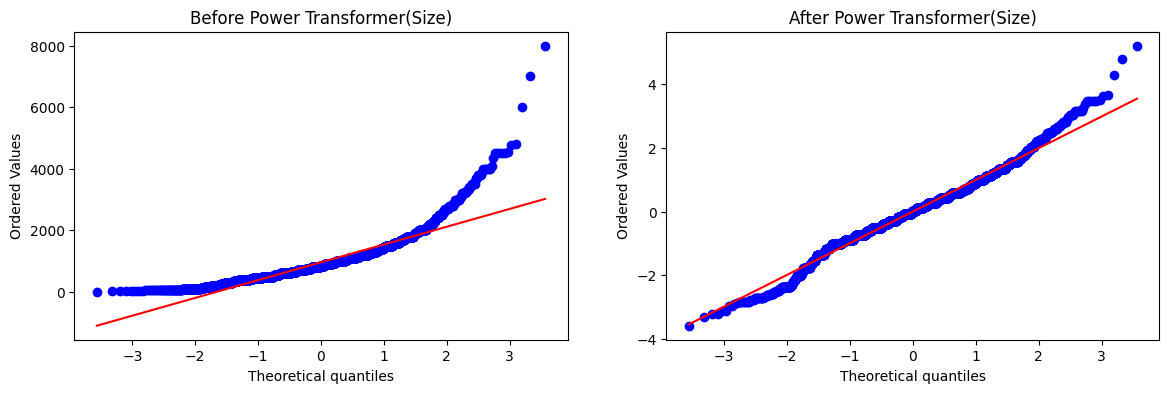

In [121]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Size'],dist='norm',plot=plt)
plt.title('Before Power Transformer(Size)')

plt.subplot(122)
stats.probplot(x_train_pt1['Size'],dist='norm',plot=plt)
plt.title("After Power Transformer(Size)")
plt.show()

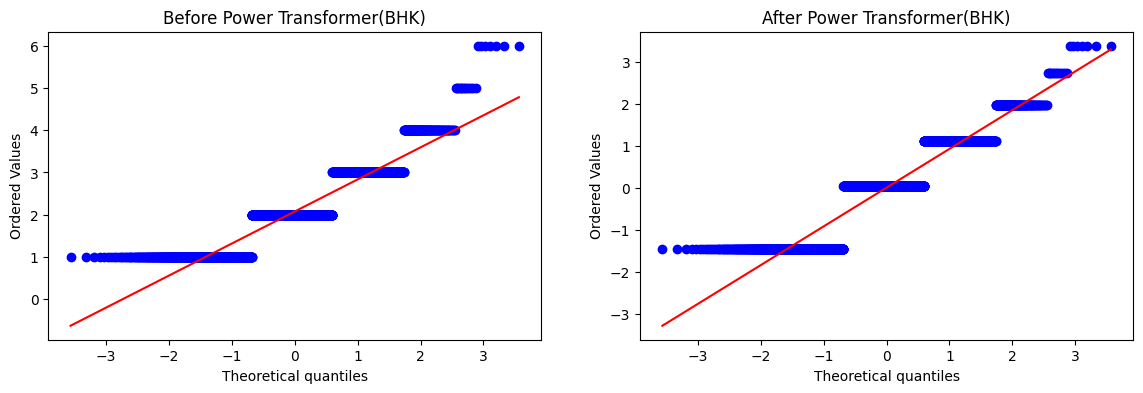

In [122]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['BHK'],dist='norm',plot=plt)
plt.title('Before Power Transformer(BHK)')

plt.subplot(122)
stats.probplot(x_train_pt1['BHK'],dist='norm',plot=plt)
plt.title("After Power Transformer(BHK)")
plt.show()

## 📐 Power Transformation (Yeo–Johnson) – Before vs After


In [123]:
pt2=PowerTransformer(method="yeo-johnson")

In [125]:
x_train_pt2=pt2.fit_transform(x_train)
x_test_pt2=pt2.transform(x_test)

In [127]:
x_train_pt2=pd.DataFrame(x_train_pt2,columns=x_train.columns)
x_test_pt2=pd.DataFrame(x_test_pt2,columns=x_test.columns)

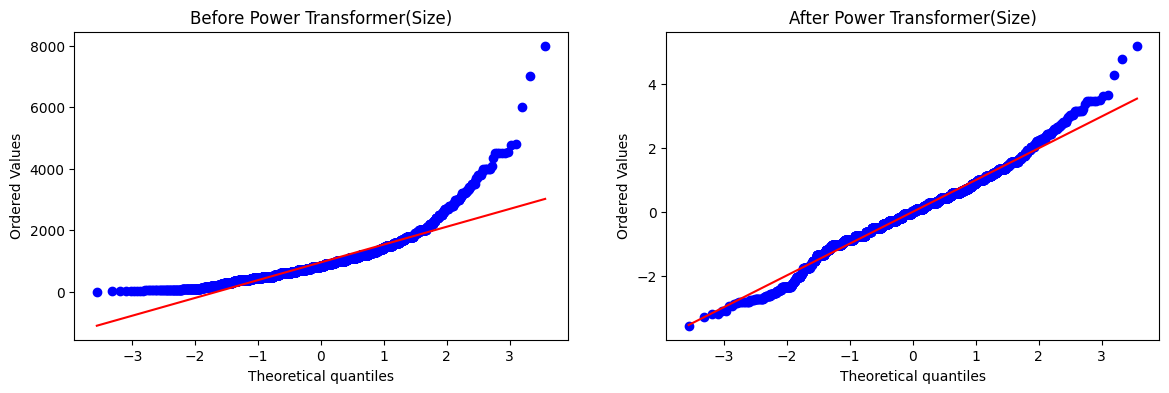

In [129]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Size'],dist='norm',plot=plt)
plt.title('Before Power Transformer(Size)')

plt.subplot(122)
stats.probplot(x_train_pt2['Size'],dist='norm',plot=plt)
plt.title("After Power Transformer(Size)")
plt.show()

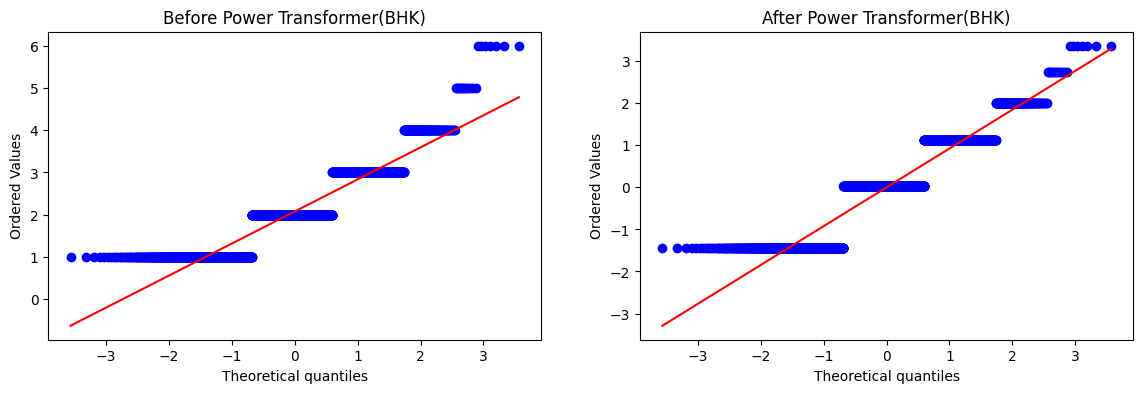

In [130]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['BHK'],dist='norm',plot=plt)
plt.title('Before Power Transformer(BHK)')

plt.subplot(122)
stats.probplot(x_train_pt2['BHK'],dist='norm',plot=plt)
plt.title("After Power Transformer(BHK)")
plt.show()